# SUNSPOT dataset

This is an average annual number of black spots observed on the sun. I propose a Neural Network MPL regressor to predict the time serie.

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#create the Neural Network and evaluate it:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,explained_variance_score     

In [2]:
#read the file and put the dataset into the data frame:
df=pd.DataFrame()
df = pd.read_fwf('D:/Neural_Network/exam/Sunspot/Sunspots',names=['date','val'])

print(df.head())
print("##############")
# verify is there is some missing value in the data set
print(df.isna().sum())

   date     val
0  1700  0.0262
1  1701  0.0575
2  1702  0.0837
3  1703  0.1203
4  1704  0.1883
##############
date    0
val     0
dtype: int64


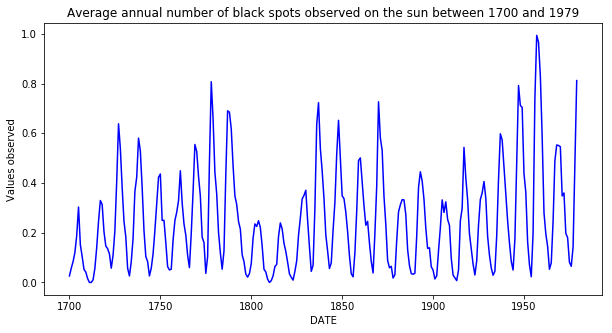

In [3]:
#plot the data set:
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['val'], color='blue')
plt.xlabel('DATE')
plt.ylabel('Values observed')
plt.title('Average annual number of black spots observed on the sun between 1700 and 1979')
plt.show()

The first step is to load the dataset and create a lagged representation. 
the observation at Year-1 is for training the model and  the observation at Year+1 is for making prediction.

In [4]:
# Create lagged dataset
values = pd.DataFrame(df['val'])
#put the values of Year-1 at the first column and Year+1 at the second column
lag=pd.concat([values.shift(1), values],axis=1)
lag.columns = ['Year-1', 'Year+1']
print(lag.head(5))

   Year-1  Year+1
0     NaN  0.0262
1  0.0262  0.0575
2  0.0575  0.0837
3  0.0837  0.1203
4  0.1203  0.1883


Split the data into train set for training the model, into test and validation set to predict and evaluate the model.

In [5]:
# split data into train set, test set and validation set:

#creation of training set (1712-1920):
X_train=np.array(lag['Year-1'][1:221]).reshape(-1,1)
y_train=np.array(lag['Year+1'][1:221]).reshape(-1,1)

#creation of validation set(1921-1955):
X_valid=np.array(lag['Year-1'][222:256]).reshape(-1,1)
y_valid=np.array(lag['Year+1'][222:256]).reshape(-1,1)

#creation of test set(1956-1979):
X_test=np.array(lag['Year-1'][255:280]).reshape(-1,1)
y_test=np.array(lag['Year+1'][255:280]).reshape(-1,1)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(220, 1)
(34, 1)
(25, 1)


The MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer,I choose 1 hidden layers of 10 neurons,
I choose the activation 'identity':no-op activation, useful to implement linear bottleneck, returns f(x) = x and the solver 'lbfgs':is an optimizer in the family of quasi-Newton methods. 
With these parameters for the data, the model converge easily to the minimum.I train the model with the training set.

In [6]:
model = MLPRegressor(hidden_layer_sizes=(10,),activation='identity',solver='lbfgs',random_state=1 )

#ravel(y_train,order=C)- for styling order, with the last axis index changing fastest, 
#back to the first axis index changing slowest
model.fit(X_train, np.ravel(y_train,order='C'))

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Evaluate the model with predictions for the test set:

In [7]:
#use the model to predict test data:
y_hat=[]
for i in range(0,(X_test.shape[0])):
    pred = model.predict(X_test[i].reshape(1,-1))
    y_hat = y_hat +[pred]
    
#print(y_hat)

Evaluate the model with predictions for the test validation:

In [8]:
#use the same model to predict validation data:
y_hat_val=[]
for j in range(0,(X_valid.shape[0])):
    pred_val = model.predict(X_valid[j].reshape(1,-1))
    y_hat_val = y_hat_val +[pred_val]
    
#print(y_hat_val)

Plot the predictions for all the data with the differents sets:

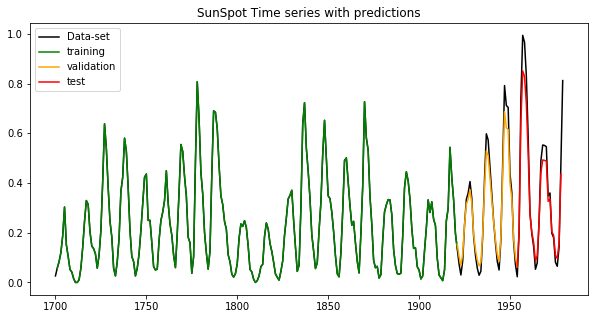

In [9]:
plt.figure(figsize=(10,5))

plt.plot(df['date'], df['val'],color='black')
plt.plot(df['date'][1:222], df['val'][1:222],color='green')
plt.plot(df['date'][221:255],y_hat_val, color='orange')
plt.plot(df['date'][254:279],y_hat, color='red')
plt.legend(['Data-set','training','validation', 'test'])
plt.title('SunSpot Time series with predictions')
plt.show()

The model predict pretty well the data for the validation but for the test set the prediction don't fit very well the data expected.

# Mean squared error regression loss

Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the sum of squared distances between our target variable and predicted values.

In [10]:
#calculation of the prediction error with mean squared error metrics
y_hat_val = np.array(y_hat_val) 
#print('MSE Y_hat_val : ')
#print(sum((y_hat_val-y_valid[0:34])**2)/34)
print('MSE validation:', (mean_squared_error(y_valid,y_hat_val)))

#print('MSE Y_hat : ')
y_hat = np.array(y_hat) 
#print(np.sum((y_hat-y_test)**2)/25)
print('MSE test:', (mean_squared_error(y_test,y_hat)))

MSE validation: 0.01619628641642304
MSE test: 0.037525235332186324


The MSE for the validation is low, the sum of squared distances between our y_val and predicted values y_hat_val are good. The MSE for the test set is the double of the validation, the sum of squared distances between our y_test and predicted values y_hat, don't fit very well the data expected.

# Average relative variance :

In [11]:
ARV=((np.sum((y_hat-y_test)**2)/25)/(np.sum(y_hat-(np.mean(y_test))**2)/280))
ARV1=((np.sum((y_hat_val-y_valid)**2)/34)/(np.sum(y_hat_val-(np.mean(y_valid))**2)/280))
print('ARV of validation:',ARV1)
print('ARV of test:',ARV)

ARV of validation: 0.6973934890845473
ARV of test: 2.298799820360359


In [13]:
#accuracy score of the model
y_test=y_test.astype('int')
y_hat = np.array(y_hat) 
y_hat=y_hat.astype('int')
y_hat_val=np.array(y_hat_val)
y_hat_val=y_hat_val.astype('int')
y_valid=y_valid.astype('int')
print('the accuracy score for the test set:',accuracy_score(y_test, y_hat))
print('the accuracy score for the validation set:',accuracy_score(y_valid, y_hat_val))

the accuracy score for the test set: 1.0
the accuracy score for the validation set: 1.0
